In [2]:
import pandas as pd
import lstm
import time
import h5py

ModelInformation = pd.read_pickle("../model/ModelInformation.pickle")
columns = ModelInformation.columns
global_start_time = time.time()
for i in range(len(ModelInformation)):
    forloop_start_time = time.time()
    #
    Filename = ModelInformation.loc[i,columns[0]]
    ColumnList = ModelInformation.loc[i,columns[1]]
    WindowSize = ModelInformation.loc[i,columns[2]]
    NumOfPredictDay = ModelInformation.loc[i,columns[3]]
    
    print('Train the ' + str(i) + '.h5 model')
    
    #載入資料
    DataSet = lstm.LoadData(Filename, ColumnList, WindowSize, NumOfPredictDay)
    #正規化資料
    NormalizeData = lstm.NormaliseWindows(DataSet)
    #切割資料
    #x_train, y_train, x_test, y_test = lstm.SplitData(NormalizeData, ColumnList, NumOfPredictDay)
    #sequence_length = WindowSize + NumOfPredictDay

    #切割訓練資料
    x_train, y_train = lstm.SplitDatatoTrain(NormalizeData, ColumnList, NumOfPredictDay)
    #切割預測資料
    x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
    x_predict = lstm.NormaliseWindows(x_predict)
    
    #
    Layer = ModelInformation.loc[i,columns[4]]
    Loss = ModelInformation.loc[i,columns[5]]
    Optimizer = ModelInformation.loc[i,columns[6]]
    
    #建立LSTM模型
    model = lstm.build_model(Layer,Loss,Optimizer)
    
    #
    BatchSize = ModelInformation.loc[i,columns[7]]
    Epoch = ModelInformation.loc[i,columns[8]]
    ValidationSplit = ModelInformation.loc[i,columns[9]]
    
    #訓練LSTM模型
    model.fit(  x_train,
                y_train,
                batch_size=BatchSize,
                nb_epoch=Epoch,
                validation_split=ValidationSplit)
    
    #
    ModelName = ModelInformation.loc[i,columns[10]]
    
    #HDF5, pip3
    model.save('../model/' + ModelName)
    print('Training duration (s) : ',time.time() - forloop_start_time)

print('Total training duration (s) : ',time.time() - global_start_time)

Train the 0.h5 model
> Compilation Time :  0.027168989181518555
Train on 2779 samples, validate on 309 samples
Epoch 1/5
2779/2779 [==============================] - 4s - loss: 11.5067 - val_loss: 12.9941
Epoch 2/5
2779/2779 [==============================] - 2s - loss: 10.4226 - val_loss: 11.5802
Epoch 3/5
2779/2779 [==============================] - 2s - loss: 9.7341 - val_loss: 10.8526
Epoch 4/5
2779/2779 [==============================] - 2s - loss: 9.2450 - val_loss: 10.1600
Epoch 5/5
2779/2779 [==============================] - 2s - loss: 8.8345 - val_loss: 9.4804
Training duration (s) :  21.31632399559021
Train the 1.h5 model
> Compilation Time :  0.029911041259765625
Train on 2772 samples, validate on 309 samples
Epoch 1/5
2772/2772 [==============================] - 4s - loss: 11.3407 - val_loss: 9.7434
Epoch 2/5
2772/2772 [==============================] - 2s - loss: 10.3840 - val_loss: 8.7950
Epoch 3/5
2772/2772 [==============================] - 2s - loss: 9.8675 - val_loss

5915/5915 [==============================] - 8s - loss: 2.2470 - val_loss: 1.4964
Epoch 2/5
5915/5915 [==============================] - 5s - loss: 1.8520 - val_loss: 1.3690
Epoch 3/5
5915/5915 [==============================] - 5s - loss: 1.7017 - val_loss: 1.2788
Epoch 4/5
5915/5915 [==============================] - 5s - loss: 1.6310 - val_loss: 1.2486
Epoch 5/5
5915/5915 [==============================] - 5s - loss: 1.5747 - val_loss: 1.2193
Training duration (s) :  38.64078092575073
Train the 14.h5 model
> Compilation Time :  0.027272939682006836
Train on 5901 samples, validate on 656 samples
Epoch 1/5
5901/5901 [==============================] - 9s - loss: 2.4337 - val_loss: 2.2281
Epoch 2/5
5901/5901 [==============================] - 6s - loss: 2.0756 - val_loss: 1.9680
Epoch 3/5
5901/5901 [==============================] - 5s - loss: 1.9050 - val_loss: 1.8138
Epoch 4/5
5901/5901 [==============================] - 6s - loss: 1.8330 - val_loss: 1.7672
Epoch 5/5
5901/5901 [======

5920/5920 [==============================] - 6s - loss: 30549.1315 - val_loss: 1.7755
Epoch 3/5
5920/5920 [==============================] - 6s - loss: 30547.8614 - val_loss: 1.6497
Epoch 4/5
5920/5920 [==============================] - 6s - loss: 30545.3470 - val_loss: 1.5537
Epoch 5/5
5920/5920 [==============================] - 6s - loss: 30541.4406 - val_loss: 1.4738
Training duration (s) :  47.62166094779968
Train the 27.h5 model
> Compilation Time :  0.030497074127197266
Train on 5913 samples, validate on 658 samples
Epoch 1/5
5913/5913 [==============================] - 17s - loss: 18409.8535 - val_loss: 2.8671
Epoch 2/5
5913/5913 [==============================] - 12s - loss: 18406.7704 - val_loss: 2.3875
Epoch 3/5
5913/5913 [==============================] - 12s - loss: 18404.9486 - val_loss: 2.1693
Epoch 4/5
5913/5913 [==============================] - 12s - loss: 18401.0025 - val_loss: 2.0197
Epoch 5/5
5913/5913 [==============================] - 12s - loss: 18398.2534 - val

5261/5261 [==============================] - 18s - loss: 129.3093 - val_loss: 0.9856
Epoch 2/5
5261/5261 [==============================] - 11s - loss: 128.0811 - val_loss: 0.9026
Epoch 3/5
5261/5261 [==============================] - 11s - loss: 127.4417 - val_loss: 0.8349
Epoch 4/5
5261/5261 [==============================] - 11s - loss: 126.3132 - val_loss: 0.8060
Epoch 5/5
5261/5261 [==============================] - 11s - loss: 125.7306 - val_loss: 0.7976
Training duration (s) :  74.38375282287598
Train the 40.h5 model
> Compilation Time :  0.026966094970703125
Train on 5255 samples, validate on 584 samples
Epoch 1/5
5255/5255 [==============================] - 18s - loss: 140.3287 - val_loss: 531.1328
Epoch 2/5
5255/5255 [==============================] - 10s - loss: 139.5813 - val_loss: 529.1493
Epoch 3/5
5255/5255 [==============================] - 11s - loss: 138.8809 - val_loss: 527.1718
Epoch 4/5
5255/5255 [==============================] - 11s - loss: 138.1837 - val_loss: 5

5206/5206 [==============================] - 19s - loss: 1458.6034 - val_loss: 12.8835
Epoch 2/5
5206/5206 [==============================] - 11s - loss: 1457.1382 - val_loss: 12.4940
Epoch 3/5
5206/5206 [==============================] - 11s - loss: 1455.7518 - val_loss: 11.9738
Epoch 4/5
5206/5206 [==============================] - 11s - loss: 1453.7346 - val_loss: 11.5295
Epoch 5/5
5206/5206 [==============================] - 11s - loss: 1452.4364 - val_loss: 11.2559
Training duration (s) :  77.89054894447327
Train the 53.h5 model
> Compilation Time :  0.02742600440979004
Train on 5192 samples, validate on 577 samples
Epoch 1/5
5192/5192 [==============================] - 20s - loss: 895.7786 - val_loss: 6.8379
Epoch 2/5
5192/5192 [==============================] - 11s - loss: 894.5290 - val_loss: 6.2999
Epoch 3/5
5192/5192 [==============================] - 13s - loss: 893.3359 - val_loss: 5.8429
Epoch 4/5
5192/5192 [==============================] - 11s - loss: 892.4975 - val_loss

3719/3719 [==============================] - 19s - loss: 42.1735 - val_loss: 13.0608
Epoch 2/5
3719/3719 [==============================] - 8s - loss: 41.3290 - val_loss: 12.4379
Epoch 3/5
3719/3719 [==============================] - 8s - loss: 40.3870 - val_loss: 11.6463
Epoch 4/5
3719/3719 [==============================] - 8s - loss: 39.4751 - val_loss: 10.8419
Epoch 5/5
3719/3719 [==============================] - 9s - loss: 38.3208 - val_loss: 10.3263
Training duration (s) :  67.43928122520447
Train the 66.h5 model
> Compilation Time :  0.030579805374145508
Train on 3713 samples, validate on 413 samples
Epoch 1/5
3713/3713 [==============================] - 24s - loss: 52.6222 - val_loss: 34.8560
Epoch 2/5
3713/3713 [==============================] - 12s - loss: 50.8970 - val_loss: 33.1686
Epoch 3/5
3713/3713 [==============================] - 11s - loss: 49.6609 - val_loss: 31.3869
Epoch 4/5
3713/3713 [==============================] - 12s - loss: 48.3426 - val_loss: 29.6196
Epoc

3361/3361 [==============================] - 25s - loss: 11.7966 - val_loss: 4.4256
Epoch 2/5
3361/3361 [==============================] - 11s - loss: 11.0019 - val_loss: 3.9958
Epoch 3/5
3361/3361 [==============================] - 11s - loss: 10.4144 - val_loss: 3.5639
Epoch 4/5
3361/3361 [==============================] - 12s - loss: 10.0298 - val_loss: 3.2374
Epoch 5/5
3361/3361 [==============================] - 11s - loss: 9.5348 - val_loss: 3.0238
Training duration (s) :  85.3069589138031
Train the 79.h5 model
> Compilation Time :  0.027675151824951172
Train on 3355 samples, validate on 373 samples
Epoch 1/5
3355/3355 [==============================] - 23s - loss: 20.7684 - val_loss: 2.1504
Epoch 2/5
3355/3355 [==============================] - 12s - loss: 20.1443 - val_loss: 1.7583
Epoch 3/5
3355/3355 [==============================] - 11s - loss: 19.5306 - val_loss: 1.5633
Epoch 4/5
3355/3355 [==============================] - 11s - loss: 19.0593 - val_loss: 1.4359
Epoch 5/5
3

2335/2335 [==============================] - 7s - loss: 1.9526 - val_loss: 0.6816
Epoch 3/5
2335/2335 [==============================] - 7s - loss: 1.7163 - val_loss: 0.6552
Epoch 4/5
2335/2335 [==============================] - 7s - loss: 1.6119 - val_loss: 0.6024
Epoch 5/5
2335/2335 [==============================] - 7s - loss: 1.5694 - val_loss: 0.5998
Training duration (s) :  66.20178604125977
Train the 92.h5 model
> Compilation Time :  0.028512001037597656
Train on 2321 samples, validate on 258 samples
Epoch 1/5
2321/2321 [==============================] - 20s - loss: 2.1656 - val_loss: 1.8129
Epoch 2/5
2321/2321 [==============================] - 7s - loss: 1.9351 - val_loss: 1.5027
Epoch 3/5
2321/2321 [==============================] - 7s - loss: 1.7351 - val_loss: 1.3598
Epoch 4/5
2321/2321 [==============================] - 7s - loss: 1.6060 - val_loss: 1.2893
Epoch 5/5
2321/2321 [==============================] - 7s - loss: 1.5444 - val_loss: 1.2024
Training duration (s) :  6

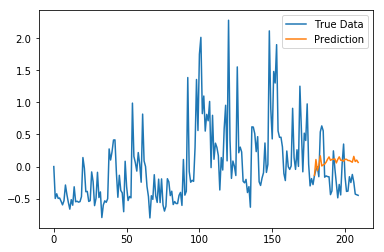

In [3]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)

In [2]:
import pandas as pd
import datetime
import time

Today = datetime.datetime.today()
Today += datetime.timedelta(1)
PredictDay = []
for i in range(30):
    date = '{0}-{1}-{2}'.format(Today.year, Today.month, Today.day)
    timeArray = time.strptime(date, "%Y-%m-%d")
    timeStamp = int(time.mktime(timeArray))
    Today += datetime.timedelta(1)
    
    PredictDay.append(timeStamp)
PredictDayofNULL = pd.DataFrame(columns=range(6), index=range(30), data='null')
PredictDayofNULL.iloc[:,0] = PredictDay
PredictDayofNULL.to_json('../json/PredictDayofNULL.json')
PredictDayofNULL

0     1     2     3     4     5
0   1505750400  null  null  null  null  null
1   1505836800  null  null  null  null  null
2   1505923200  null  null  null  null  null
3   1506009600  null  null  null  null  null
4   1506096000  null  null  null  null  null
5   1506182400  null  null  null  null  null
6   1506268800  null  null  null  null  null
7   1506355200  null  null  null  null  null
8   1506441600  null  null  null  null  null
9   1506528000  null  null  null  null  null
10  1506614400  null  null  null  null  null
11  1506700800  null  null  null  null  null
12  1506787200  null  null  null  null  null
13  1506873600  null  null  null  null  null
14  1506960000  null  null  null  null  null
15  1507046400  null  null  null  null  null
16  1507132800  null  null  null  null  null
17  1507219200  null  null  null  null  null
18  1507305600  null  null  null  null  null
19  1507392000  null  null  null  null  null
20  1507478400  null  null  null  null  null
21  1507564800  null  null  null  null  null
22  1507651200  null  null  null  null  null
23  1507737600  null  null  null  null  null
24  1507824000  null  null  null  null  null
25  1507910400  null  null  null  null  null
26  1507996800  null  null  null  null  null
27  1508083200  null  null  null  null  null
28  1508169600  null  null  null  null  null
29  1508256000  null  null  null  null  null

In [3]:
import os
import pandas as pd
DataList = os.listdir('../data')
for CSV in DataList[0:-2]:
    CSVFile = pd.read_csv('../data/' + CSV)
    CSVFile.to_json('../json/' + CSV[:-4] + '.json')